In [1]:
import numpy as np
import matplotlib.pyplot as plt

import os
from PIL import Image
import PIL.ImageOps    

from skimage.morphology import skeletonize
import skimage.util
from skimage.color import rgb2gray
from skimage.filters import roberts, sobel
from skimage.filters import threshold_otsu
from skimage.morphology import binary_closing


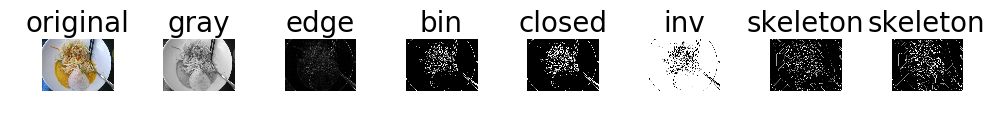

In [2]:
arraydirectory= './edge_array/'
photodirectory='./photos/'

image=np.array(Image.open(photodirectory + '7078.jpg'))
img_gray = rgb2gray(image)
img_edge=roberts(img_gray)
thresh = threshold_otsu(img_edge)
img_bin = img_edge > thresh
img_closed=binary_closing(img_bin)
img_inv=abs(np.add(img_closed,-1))
img_inv=img_inv==1

#image_clean=skimage.morphology.remove_small_objects(image_inv,connectivity=3)
# perform skeletonization
skeleton = skeletonize(img_inv)

thresh_sk=threshold_otsu(skeleton)
skeleton_bin=skeleton>thresh_sk
skeleton_closed=binary_closing(skeleton_bin)
# display results
fig, axes = plt.subplots(nrows=1, ncols=8, figsize=(10, 5),
                         sharex=True, sharey=True,
                         subplot_kw={'adjustable': 'box-forced'})

ax = axes.ravel()

ax[0].imshow(image, cmap=plt.cm.gray)
ax[0].axis('off')
ax[0].set_title('original', fontsize=20)

ax[1].imshow(img_gray, cmap=plt.cm.gray)
ax[1].axis('off')
ax[1].set_title('gray', fontsize=20)

ax[2].imshow(img_edge, cmap=plt.cm.gray)
ax[2].axis('off')
ax[2].set_title('edge', fontsize=20)

ax[3].imshow(img_bin, cmap=plt.cm.gray)
ax[3].axis('off')
ax[3].set_title('bin', fontsize=20)

ax[4].imshow(img_closed, cmap=plt.cm.gray)
ax[4].axis('off')
ax[4].set_title('closed', fontsize=20)

ax[5].imshow(img_inv, cmap=plt.cm.gray)
ax[5].axis('off')
ax[5].set_title('inv', fontsize=20)

ax[6].imshow(skeleton, cmap=plt.cm.gray)
ax[6].axis('off')
ax[6].set_title('skeleton', fontsize=20)

ax[7].imshow(skeleton_closed, cmap=plt.cm.gray)
ax[7].axis('off')
ax[7].set_title('skeleton', fontsize=20)


fig.tight_layout()
plt.show()

Closed-Binarization of the edge operator (Roberts) seems more usefull than the inverse transformation with consecutive Skeletonize.

In [4]:
arraydirectory= '../FeatureSampleFoodClassification/array_skeleton/'
photodirectory='../SampleFoodClassifier_Norm/'

if not os.path.exists(arraydirectory):
    os.makedirs(arraydirectory)
    
for fn in os.listdir(photodirectory):
    if os.path.isfile(photodirectory + fn) and '.jpg' in fn:
        img=np.array(Image.open(photodirectory + fn))
        img_gray = rgb2gray(img)
        img_edge=roberts(img_gray)
        thresh = threshold_otsu(img_edge)
        img_bin = img_edge > thresh
        img_closed=binary_closing(img_bin)
        img_inv=abs(np.add(img_closed,-1))
        # perform skeletonization
        skeleton = skeletonize(img_inv)
        #binarization of skeleton
        thresh_sk=threshold_otsu(skeleton)
        skeleton_bin=skeleton>thresh_sk
        skeleton_closed=binary_closing(skeleton_bin)
        skeleton_flat=[item for sublist in skeleton_closed for item in sublist]
        np.save(arraydirectory + fn,skeleton_flat)
        
print('done')

done
